<a href="https://colab.research.google.com/github/nehadubey1205/NLP-college/blob/main/ResearchPaper_SentEmoNehaDubey_016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment-1

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
data= pd.read_csv(r'/content/drive/MyDrive/Bully_Sent_Emo_IEEEIC_6084.csv')
data.head(10)

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label
0,Teri maa ki chut me Shivsena ka lund gaya kya,Teri maa ki chut me Shivsena ka lund gaya kya,1,Negative,Anger
1,Han muje pata hai teri maa ka ke gufa me jati thi,Han muje pata hai teri maa ka ke gufa me jati thi,1,Negative,Others
2,Tum kaha se aa gye bhai tumlog toh saree pehen...,Tum kaha se aa gye bhai tumlog toh saree pehen...,0,Neutral,Others
3,Koi moti🙊kisi ki besti😁 baisn ka or channey ki...,Koi motikisi ki besti baisn ka or channey ki d...,1,Negative,Disgust
4,Rahul kanwal aaj nanga hoke road per nachega 😂,Rahul kanwal aaj nanga hoke road per nachega,1,Negative,Disgust
5,@riteshrajwada Good morning Raj bhaiya apka di...,Good morning Raj bhaiya apka din behad khubsur...,0,Positive,Happiness
6,Tera baap bi paltu kutta Hoga Teri maa ka agar...,Tera baap bi paltu kutta Hoga Teri maa ka agar...,1,Negative,Others
7,Kya be tihari fan \nHar baar gandu ki har...,Kya be tihari fan Har baar gandu ki harah aa j...,1,Negative,Disgust
8,@apeidiotstuff Hi deer\n\nYara tum ko shaadi p...,Hi deerYara tum ko shaadi py dekha thaBuht khu...,0,Positive,Happiness
9,@iffii_khan1 @HoorainPervaiz @RehamKhan1 Randi...,Randi k bachy is thran 1947 mai tu chi thi nim...,1,Negative,Disgust


In [ ]:
data['Sentiment_label'].value_counts()

Negative    3227
Positive    1530
Neutral     1327
Name: Sentiment_label, dtype: int64

In [ ]:
data['Bully_Label'].value_counts()# positive and neutral =0 , negative =1

1    3050
0    3034
Name: Bully_Label, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6084 entries, 0 to 6083
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tweets            6084 non-null   object
 1   Processed_Tweets  6084 non-null   object
 2   Bully_Label       6084 non-null   int64 
 3   Sentiment_label   6084 non-null   object
 4   Emotion_label     6084 non-null   object
dtypes: int64(1), object(4)
memory usage: 237.8+ KB


In [ ]:
data.isnull().sum()

Tweets              0
Processed_Tweets    0
Bully_Label         0
Sentiment_label     0
Emotion_label       0
dtype: int64

Question-2

In [ ]:
data.shape

(6084, 5)

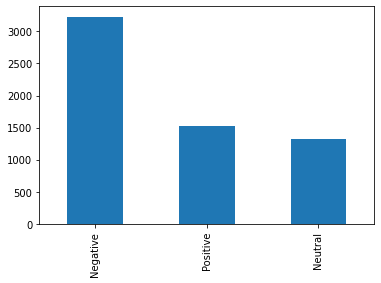

In [ ]:
#data = data(np.random.rand(10, 4), columns=['Bully_Label',	'Sentiment_label','Emotion_label'])
df = pd.DataFrame(data, columns=['Bully_Label',	'Sentiment_label','Emotion_label'])
#df.plot(x="Emotion_label", y=['Bully_Label'], kind="bar", figsize=(9, 8))
#[1261]: df2.plot(kind='bar');


df['Sentiment_label'].value_counts().plot(kind='bar')

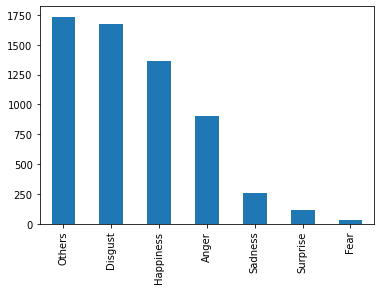

In [ ]:
df['Emotion_label'].value_counts().plot(kind='bar')

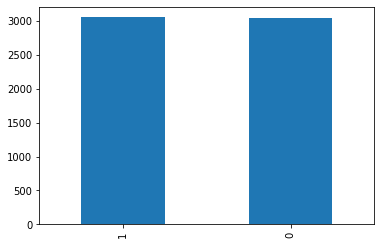

In [ ]:
df['Bully_Label'].value_counts().plot(kind='bar')

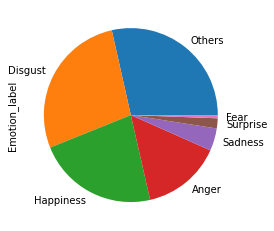

In [ ]:
df['Emotion_label'].value_counts().head(10).plot.pie()

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

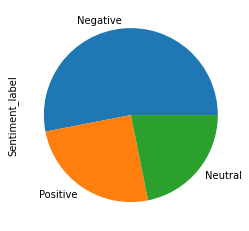

In [ ]:
df['Sentiment_label'].value_counts().head(10).plot.pie()

plt.gca().set_aspect('equal')

In [ ]:
from collections import Counter 

Q-3, word count

In [ ]:
df['Emotion_label'].value_counts()

Others       1735
Disgust      1678
Happiness    1367
Anger         900
Sadness       254
Surprise      114
Fear           36
Name: Emotion_label, dtype: int64

Question-4
''Preprocessing: Create a new column ‘preprocessed_text’ ''

In [ ]:
from google.colab import files

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('hinglish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stop)

{'ltd', 'jis', 'kaafi', 'bohot', 'all', 'once', 'besides', 'herself', 'eight', 'truly', 'jin', 'name', 'likely', 'kahaa', 'banao', 'allow', 'anyways', 'her', 'nahin', 'yet', 'lest', 'same', 'thought', 'denge', 'hereafter', 'dekh', 'insofar', "i've", 'kisi', 'further', 'ours', 'shouldnt', 'arre', 'jayega', 'behind', 'jyada', 'sent', 'lagte', 'ka', 'kine', 'karta', 'huh', 'kiya', 'needs', 'kyaa', "haven't", 'first', 'over', 'take', 'thanx', 'why', 'jidhar', 'about', 'sakti', 'we', 'bolte', 'can', 'let', 'jinki', 'certainly', 'jaise', 'when', 'unless', 'really', 'regards', 'dusra', "didn't", 'hoga', 'khud', 'vaisa', 'sakte', 'bol', 'fir', 'followed', 'bhai', 'clearly', 'such', 'this', 'says', 'jo', 'would', 'gayi', "it's", 'thence', 'own', 'appear', 'often', 'hain', "ain't", 'hoge', 'nope', 'rhe', 'doing', 'herein', 'tends', 'hmm', 'teeno', 'boli', 'krna', 'ityadi', 'want', 'karne', 'kari', 'wherever', 'best', 'later', 'having', 'sometimes', 'second', 'ourselves', 'mujhe', 'wala', 'off', 

In [ ]:
data['tweet_stopwords'] = data['Processed_Tweets'].apply(str.lower)

In [ ]:
data['tweet_stopwords'] = data['Processed_Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
data

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords
0,Teri maa ki chut me Shivsena ka lund gaya kya,Teri maa ki chut me Shivsena ka lund gaya kya,1,Negative,Anger,Teri maa chut Shivsena lund
1,Han muje pata hai teri maa ka ke gufa me jati thi,Han muje pata hai teri maa ka ke gufa me jati thi,1,Negative,Others,Han muje maa gufa jati
2,Tum kaha se aa gye bhai tumlog toh saree pehen...,Tum kaha se aa gye bhai tumlog toh saree pehen...,0,Neutral,Others,Tum aa gye tumlog saree pehen chup baithe aahe...
3,Koi moti🙊kisi ki besti😁 baisn ka or channey ki...,Koi motikisi ki besti baisn ka or channey ki d...,1,Negative,Disgust,Koi motikisi besti baisn channey dal halwa kha...
4,Rahul kanwal aaj nanga hoke road per nachega 😂,Rahul kanwal aaj nanga hoke road per nachega,1,Negative,Disgust,Rahul kanwal nanga hoke road nachega
...,...,...,...,...,...,...
6079,dali sali kayo fhshdhdhdhd no need to follow m...,dali sali kayo fhshdhdhdhd no need to follow m...,0,Neutral,Others,dali sali kayo fhshdhdhdhd follow naman I rand...
6080,@AnjaliSingh_INC Tum rajput pehle mugalon ka b...,Tum rajput pehle mugalon ka bistar garm krti t...,1,Negative,Disgust,Tum rajput mugalon bistar garm krti phir angre...
6081,Khatna pe to bol diya ek baat bata upar wala t...,Khatna pe to bol diya ek baat bata upar wala t...,1,Negative,Others,Khatna baat nanga paida nanga rahta kapda pehn…
6082,Chal be bhadwe sanghi.. teri maa ki choot me g...,Chal be bhadwe sanghi teri maa ki choot me gho...,1,Negative,Disgust,Chal bhadwe sanghi maa choot ghode la lund zin...


In [ ]:
#data['Stop_words']=data['Processed_Tweets'].apply(lambda x: len(set(x.split())& stopwrd))

In [ ]:
data['tweet_stopwords'].tail()

6079    dali sali kayo fhshdhdhdhd follow naman I rand...
6080    Tum rajput mugalon bistar garm krti phir angre...
6081      Khatna baat nanga paida nanga rahta kapda pehn…
6082    Chal bhadwe sanghi maa choot ghode la lund zin...
6083    इश्क़ में थे जबवादा हमारादावा भी हमाराधोखा उनक...
Name: tweet_stopwords, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk

nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
data['After_lemma'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in data['tweet_stopwords']]
#test['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in test['tweet']]

In [ ]:
data.tail(3)

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords,After_lemma
6081,Khatna pe to bol diya ek baat bata upar wala t...,Khatna pe to bol diya ek baat bata upar wala t...,1,Negative,Others,Khatna baat nanga paida nanga rahta kapda pehn…,Khatna baat nanga paida nanga rahta kapda pehn
6082,Chal be bhadwe sanghi.. teri maa ki choot me g...,Chal be bhadwe sanghi teri maa ki choot me gho...,1,Negative,Disgust,Chal bhadwe sanghi maa choot ghode la lund zin...,Chal bhadwe sanghi maa choot ghode la lund zin...
6083,"इश्क़ में थे जब,\nवादा हमारा,\nदावा भी हमारा,\...",इश्क़ में थे जबवादा हमारादावा भी हमाराधोखा उनक...,0,Neutral,Sadness,इश्क़ में थे जबवादा हमारादावा भी हमाराधोखा उनक...,...


In [ ]:
#data.drop(6083)# this is the only row which is different, so I am dropping this

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords,After_lemma
0,Teri maa ki chut me Shivsena ka lund gaya kya,Teri maa ki chut me Shivsena ka lund gaya kya,1,Negative,Anger,Teri maa chut Shivsena lund,Teri maa chut Shivsena lund
1,Han muje pata hai teri maa ka ke gufa me jati thi,Han muje pata hai teri maa ka ke gufa me jati thi,1,Negative,Others,Han muje maa gufa jati,Han muje maa gufa jati
2,Tum kaha se aa gye bhai tumlog toh saree pehen...,Tum kaha se aa gye bhai tumlog toh saree pehen...,0,Neutral,Others,Tum aa gye tumlog saree pehen chup baithe aahe...,Tum aa gye tumlog saree pehen chup baithe aahe...
3,Koi moti🙊kisi ki besti😁 baisn ka or channey ki...,Koi motikisi ki besti baisn ka or channey ki d...,1,Negative,Disgust,Koi motikisi besti baisn channey dal halwa kha...,Koi motikisi besti baisn channey dal halwa kha...
4,Rahul kanwal aaj nanga hoke road per nachega 😂,Rahul kanwal aaj nanga hoke road per nachega,1,Negative,Disgust,Rahul kanwal nanga hoke road nachega,Rahul kanwal nanga hoke road nachega
...,...,...,...,...,...,...,...
6078,@Zaid078612 @ErShikhaforBJP @bhupeshbaghel Ter...,Teri maa se bhi aise hi bolta h kya kuttiya h,1,Negative,Disgust,Teri maa h kuttiya h,Teri maa h kuttiya h
6079,dali sali kayo fhshdhdhdhd no need to follow m...,dali sali kayo fhshdhdhdhd no need to follow m...,0,Neutral,Others,dali sali kayo fhshdhdhdhd follow naman I rand...,dali sali kayo fhshdhdhdhd follow naman I rand...
6080,@AnjaliSingh_INC Tum rajput pehle mugalon ka b...,Tum rajput pehle mugalon ka bistar garm krti t...,1,Negative,Disgust,Tum rajput mugalon bistar garm krti phir angre...,Tum rajput mugalon bistar garm krti phir angre...
6081,Khatna pe to bol diya ek baat bata upar wala t...,Khatna pe to bol diya ek baat bata upar wala t...,1,Negative,Others,Khatna baat nanga paida nanga rahta kapda pehn…,Khatna baat nanga paida nanga rahta kapda pehn


In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')

ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#5. POS Tagging 

from collections import Counter
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Question -6 '''Find length of text, punctuation, stop word

In [ ]:
data['Processed_Tweets_len']  = data['Processed_Tweets'].str.len()
data.head(30)
# length of the text

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords,After_lemma,Processed_Tweets_len
0,Teri maa ki chut me Shivsena ka lund gaya kya,Teri maa ki chut me Shivsena ka lund gaya kya,1,Negative,Anger,Teri maa chut Shivsena lund,Teri maa chut Shivsena lund,45
1,Han muje pata hai teri maa ka ke gufa me jati thi,Han muje pata hai teri maa ka ke gufa me jati thi,1,Negative,Others,Han muje maa gufa jati,Han muje maa gufa jati,49
2,Tum kaha se aa gye bhai tumlog toh saree pehen...,Tum kaha se aa gye bhai tumlog toh saree pehen...,0,Neutral,Others,Tum aa gye tumlog saree pehen chup baithe aahe...,Tum aa gye tumlog saree pehen chup baithe aahe...,100
3,Koi moti🙊kisi ki besti😁 baisn ka or channey ki...,Koi motikisi ki besti baisn ka or channey ki d...,1,Negative,Disgust,Koi motikisi besti baisn channey dal halwa kha...,Koi motikisi besti baisn channey dal halwa kha...,192
4,Rahul kanwal aaj nanga hoke road per nachega 😂,Rahul kanwal aaj nanga hoke road per nachega,1,Negative,Disgust,Rahul kanwal nanga hoke road nachega,Rahul kanwal nanga hoke road nachega,44
5,@riteshrajwada Good morning Raj bhaiya apka di...,Good morning Raj bhaiya apka din behad khubsur...,0,Positive,Happiness,Good morning Raj bhaiya apka din behad khubsur...,Good morning Raj bhaiya apka din behad khubsur...,68
6,Tera baap bi paltu kutta Hoga Teri maa ka agar...,Tera baap bi paltu kutta Hoga Teri maa ka agar...,1,Negative,Others,Tera baap bi paltu kutta Hoga Teri maa abhinav...,Tera baap bi paltu kutta Hoga Teri maa abhinav...,110
7,Kya be tihari fan \nHar baar gandu ki har...,Kya be tihari fan Har baar gandu ki harah aa j...,1,Negative,Disgust,Kya tihari fan Har gandu harah aa jate,Kya tihari fan Har gandu harah aa jate,52
8,@apeidiotstuff Hi deer\n\nYara tum ko shaadi p...,Hi deerYara tum ko shaadi py dekha thaBuht khu...,0,Positive,Happiness,Hi deerYara shaadi py thaBuht khubsurat lag,Hi deerYara shaadi py thaBuht khubsurat lag,71
9,@iffii_khan1 @HoorainPervaiz @RehamKhan1 Randi...,Randi k bachy is thran 1947 mai tu chi thi nim...,1,Negative,Disgust,Randi bachy thran 1947 chi nimushraf behan kiu...,Randi bachy thran chi nimushraf behan kiu...,110


In [ ]:
data['tweet_stopwords_len']  = data['tweet_stopwords'].str.len()
data.head(4)
# length of stop word

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords,After_lemma,Processed_Tweets_len,tweet_stopwords_len
0,Teri maa ki chut me Shivsena ka lund gaya kya,Teri maa ki chut me Shivsena ka lund gaya kya,1,Negative,Anger,Teri maa chut Shivsena lund,Teri maa chut Shivsena lund,45,27
1,Han muje pata hai teri maa ka ke gufa me jati thi,Han muje pata hai teri maa ka ke gufa me jati thi,1,Negative,Others,Han muje maa gufa jati,Han muje maa gufa jati,49,22
2,Tum kaha se aa gye bhai tumlog toh saree pehen...,Tum kaha se aa gye bhai tumlog toh saree pehen...,0,Neutral,Others,Tum aa gye tumlog saree pehen chup baithe aahe...,Tum aa gye tumlog saree pehen chup baithe aahe...,100,60
3,Koi moti🙊kisi ki besti😁 baisn ka or channey ki...,Koi motikisi ki besti baisn ka or channey ki d...,1,Negative,Disgust,Koi motikisi besti baisn channey dal halwa kha...,Koi motikisi besti baisn channey dal halwa kha...,192,137


In [ ]:
#This would remove all characters except alphabets and digits.

#data['Punctuation'] = data['After_lemma'].apply(lambda x: re.sub('[^A-Za-z0-9]', ' ', x))

In [ ]:
def check_find_punctuations(text):
    
    # regular expression containing
    # all punctuation
    result = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', 
                        text)
      
    # form a string
    string = "".join(result)
      
    # list of strings return
    return list(string)
    
# creating new column name
# as a punctuation_used and 
# applying user defined function
# on each rows of Comments column
data['punct_'] = data['After_lemma'].apply(
                         lambda x : check_find_punctuations(x)
                         )
  
# show the Dataframe
data.head()

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords,After_lemma,Processed_Tweets_len,tweet_stopwords_len,punct_
0,Teri maa ki chut me Shivsena ka lund gaya kya,Teri maa ki chut me Shivsena ka lund gaya kya,1,Negative,Anger,Teri maa chut Shivsena lund,Teri maa chut Shivsena lund,45,27,[]
1,Han muje pata hai teri maa ka ke gufa me jati thi,Han muje pata hai teri maa ka ke gufa me jati thi,1,Negative,Others,Han muje maa gufa jati,Han muje maa gufa jati,49,22,[]
2,Tum kaha se aa gye bhai tumlog toh saree pehen...,Tum kaha se aa gye bhai tumlog toh saree pehen...,0,Neutral,Others,Tum aa gye tumlog saree pehen chup baithe aahe...,Tum aa gye tumlog saree pehen chup baithe aahe...,100,60,[]
3,Koi moti🙊kisi ki besti😁 baisn ka or channey ki...,Koi motikisi ki besti baisn ka or channey ki d...,1,Negative,Disgust,Koi motikisi besti baisn channey dal halwa kha...,Koi motikisi besti baisn channey dal halwa kha...,192,137,[]
4,Rahul kanwal aaj nanga hoke road per nachega 😂,Rahul kanwal aaj nanga hoke road per nachega,1,Negative,Disgust,Rahul kanwal nanga hoke road nachega,Rahul kanwal nanga hoke road nachega,44,36,[]


In [ ]:
data["mentions"]=data["After_lemma"].str.count("@")
data.head()

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords,After_lemma,Processed_Tweets_len,tweet_stopwords_len,punct_,mentions
0,Teri maa ki chut me Shivsena ka lund gaya kya,Teri maa ki chut me Shivsena ka lund gaya kya,1,Negative,Anger,Teri maa chut Shivsena lund,Teri maa chut Shivsena lund,45,27,[],0
1,Han muje pata hai teri maa ka ke gufa me jati thi,Han muje pata hai teri maa ka ke gufa me jati thi,1,Negative,Others,Han muje maa gufa jati,Han muje maa gufa jati,49,22,[],0
2,Tum kaha se aa gye bhai tumlog toh saree pehen...,Tum kaha se aa gye bhai tumlog toh saree pehen...,0,Neutral,Others,Tum aa gye tumlog saree pehen chup baithe aahe...,Tum aa gye tumlog saree pehen chup baithe aahe...,100,60,[],0
3,Koi moti🙊kisi ki besti😁 baisn ka or channey ki...,Koi motikisi ki besti baisn ka or channey ki d...,1,Negative,Disgust,Koi motikisi besti baisn channey dal halwa kha...,Koi motikisi besti baisn channey dal halwa kha...,192,137,[],0
4,Rahul kanwal aaj nanga hoke road per nachega 😂,Rahul kanwal aaj nanga hoke road per nachega,1,Negative,Disgust,Rahul kanwal nanga hoke road nachega,Rahul kanwal nanga hoke road nachega,44,36,[],0


In [ ]:
data['punct']  = data['punct_'].str.len()
data.head(4)

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords,After_lemma,Processed_Tweets_len,tweet_stopwords_len,punct_,mentions,punct
0,Teri maa ki chut me Shivsena ka lund gaya kya,Teri maa ki chut me Shivsena ka lund gaya kya,1,Negative,Anger,Teri maa chut Shivsena lund,Teri maa chut Shivsena lund,45,27,[],0,0
1,Han muje pata hai teri maa ka ke gufa me jati thi,Han muje pata hai teri maa ka ke gufa me jati thi,1,Negative,Others,Han muje maa gufa jati,Han muje maa gufa jati,49,22,[],0,0
2,Tum kaha se aa gye bhai tumlog toh saree pehen...,Tum kaha se aa gye bhai tumlog toh saree pehen...,0,Neutral,Others,Tum aa gye tumlog saree pehen chup baithe aahe...,Tum aa gye tumlog saree pehen chup baithe aahe...,100,60,[],0,0
3,Koi moti🙊kisi ki besti😁 baisn ka or channey ki...,Koi motikisi ki besti baisn ka or channey ki d...,1,Negative,Disgust,Koi motikisi besti baisn channey dal halwa kha...,Koi motikisi besti baisn channey dal halwa kha...,192,137,[],0,0


In [ ]:
''' data['punct'] = df['After_lemma'].str.replace(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', '')
print(data) '''

' data[\'punct\'] = df[\'After_lemma\'].str.replace(r\'[!"\\$%&\'()*+,\\-.\\/:;=#@?\\[\\\\]^_`{|}~]*\', \'\')\nprint(data) '

Find correlation

In [ ]:
data.drop(columns=['Processed_Tweets_len']).corrwith(data['Bully_Label'])

Bully_Label            1.000000
tweet_stopwords_len   -0.118716
mentions                    NaN
punct                       NaN
dtype: float64

In [ ]:
data['Processed_Tweets_len'].corr(data['Bully_Label'])

-0.0753872598373129

In [ ]:
data['tweet_stopwords_len'].corr(data['Bully_Label'])

-0.1187157340510767

In [ ]:
data['punct'].corr(data['Bully_Label'])

nan

In [ ]:
import seaborn as sns

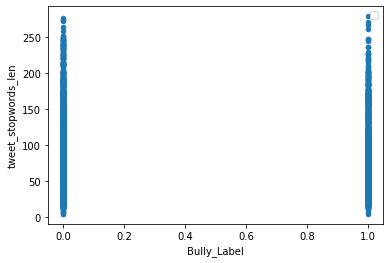

In [ ]:
data.plot.scatter(x='Bully_Label', y='tweet_stopwords_len')
plt.legend()
plt.show()

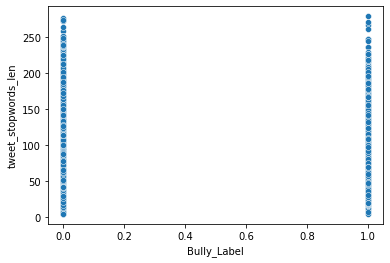

In [ ]:
#import seaborn as sns
#sns.scatterplot(x= data['tweet_stopwords_len'], y= data['Bully_Label'])
#sns.scatterplot(x= data['Bully_Label'], y= data['tweet_stopwords_len'])

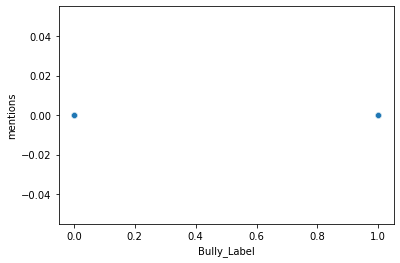

In [ ]:
sns.scatterplot(x= data['Bully_Label'], y= data['mentions'])

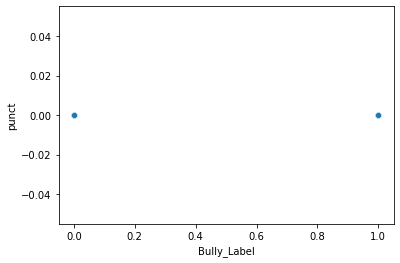

In [ ]:
sns.scatterplot(x= data['Bully_Label'], y= data['punct'])

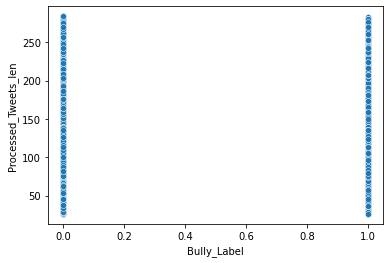

In [ ]:
sns.scatterplot(x= data['Bully_Label'], y= data['Processed_Tweets_len'])

In [ ]:
# create word cloud
from wordcloud import WordCloud

In [ ]:
text = " ".join(i for i in data.After_lemma)

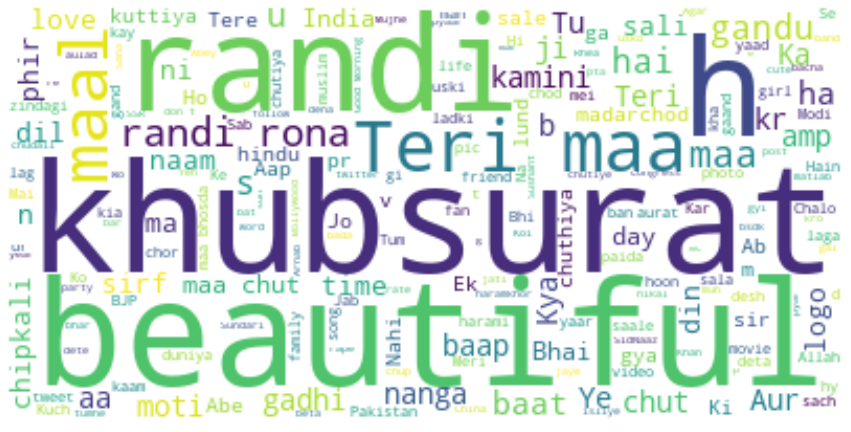

In [ ]:
wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Starting with the CountVectorizer/TfidfTransformer approach...
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cvec = CountVectorizer( min_df=1, max_df=.5, ngram_range=(1,2))
cvec

CountVectorizer(max_df=0.5, ngram_range=(1, 2))

Question 7

*performing on original data*

In [ ]:
from itertools import islice


In [ ]:

cvec.fit(data.Processed_Tweets)
list(islice(cvec.vocabulary_.items(), 20))

[('teri', 89180),
 ('maa', 59149),
 ('ki', 51247),
 ('chut', 19823),
 ('me', 62115),
 ('shivsena', 84403),
 ('ka', 45682),
 ('lund', 58955),
 ('gaya', 30264),
 ('kya', 55103),
 ('teri maa', 89300),
 ('maa ki', 59255),
 ('ki chut', 51440),
 ('chut me', 19917),
 ('me shivsena', 62575),
 ('shivsena ka', 84405),
 ('ka lund', 46149),
 ('lund gaya', 58969),
 ('gaya kya', 30305),
 ('han', 34674)]

In [ ]:
cvec_counts = cvec.transform(data.After_lemma)

In [ ]:
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
P1_V1 = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,occurrences
59149,maa,1057
77442,randi,963
11151,beautiful,703
50673,khubsurat,683
89180,teri,542
59369,maal,447
89300,teri maa,366
79442,rona,323
77644,randi rona,306
19823,chut,288


*performing on processed data*

In [ ]:
# Calculate all the n-grams found in all documents
cvec.fit(data.After_lemma)
list(islice(cvec.vocabulary_.items(), 20))

[('teri', 68152),
 ('maa', 43772),
 ('chut', 15347),
 ('shivsena', 63856),
 ('lund', 43564),
 ('teri maa', 68210),
 ('maa chut', 43923),
 ('chut shivsena', 15523),
 ('shivsena lund', 63859),
 ('han', 27926),
 ('muje', 48916),
 ('gufa', 26191),
 ('jati', 33830),
 ('han muje', 27941),
 ('muje maa', 48922),
 ('maa gufa', 43987),
 ('gufa jati', 26193),
 ('tum', 70498),
 ('aa', 0),
 ('gye', 26524)]

In [ ]:
cvec_counts2 = cvec.transform(data.After_lemma)

In [ ]:
occ = np.asarray(cvec_counts2.sum(axis=0)).ravel().tolist()
P2_V1 = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
P2_V1.sort_values(by='occurrences', ascending=False).head(20)

,term,occurrences
43772,maa,1057
58060,randi,963
7785,beautiful,703
38170,khubsurat,683
68152,teri,542
44309,maal,447
68210,teri maa,366
59989,rona,323
58344,randi rona,306
15347,chut,288


**BAG of Word**

In [ ]:
#  bag of word 
#Original data

In [ ]:
list_of_texts1 = data['Processed_Tweets'].tolist()
#print(list_of_texts)
vectorizer = CountVectorizer(min_df=1)
term_doc_matrix = vectorizer.fit_transform(list_of_texts1)
print(term_doc_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Put BoW vectors into a new df
P1_V2 = pd.DataFrame(term_doc_matrix.toarray(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(P1_V2)

      000  001  00l  011  0208  03  033021  090  10  100  ...  हलचल  हलचलअ  \
0       0    0    0    0     0   0       0    0   0    0  ...     0      0   
1       0    0    0    0     0   0       0    0   0    0  ...     0      0   
2       0    0    0    0     0   0       0    0   0    0  ...     0      0   
3       0    0    0    0     0   0       0    0   0    0  ...     0      0   
4       0    0    0    0     0   0       0    0   0    0  ...     0      0   
...   ...  ...  ...  ...   ...  ..     ...  ...  ..  ...  ...   ...    ...   
6079    0    0    0    0     0   0       0    0   0    0  ...     0      0   
6080    0    0    0    0     0   0       0    0   0    0  ...     0      0   
6081    0    0    0    0     0   0       0    0   0    0  ...     0      0   
6082    0    0    0    0     0   0       0    0   0    0  ...     0      0   
6083    0    0    0    0     0   0       0    0   0    0  ...     0      0   

      हव  हस  हसत  हसरत  ಕಡಚಗ  ㅤㅤ  ㅤㅤi  ㅤㅤㅤㅤwell  
0      0   0

In [ ]:
#  bag of word 
# preprocessed data
list_of_texts = data['After_lemma'].tolist()
print(list_of_texts)

['Teri maa chut Shivsena lund', 'Han muje maa gufa jati', 'Tum aa gye tumlog saree pehen chup baithe aahe chodna sikha ', 'Koi motikisi besti baisn channey dal halwa kha tora work kartey howey takey inno besti howa soji halwa khaiya jaey Note h samjh rhey moti', 'Rahul kanwal nanga hoke road nachega', 'Good morning Raj bhaiya apka din behad khubsurat Sukoon bhara', 'Tera baap bi paltu kutta Hoga Teri maa abhinav toTere jese pati patni neecha dikhate', 'Kya tihari fan Har gandu harah aa jate', 'Hi deerYara shaadi py thaBuht khubsurat lag', 'Randi bachy thran      chi nimushraf behan kiun dy haizardari dy nakuti run bachy', 'Iss madrchod phir g Marwa bsdk gandu wajh match dekhna band padega benchod', 'Mrs lies shit filled lady hate filled Hindus Ishtar Jahaan innocent Doob mar kutiya Tere muh suvar poti Randi saali', 'Teri maa chooth bhrdweAb randi hashar', 'Dekha khwaab silsile beautiful song', 'Reena Chachi jesa maal biwi hmesha chhipa rkhta din raat bed patak patak chdtaLekin chacha s

In [ ]:
vectorizer = CountVectorizer(min_df=1)
term_doc_matrix = vectorizer.fit_transform(list_of_texts)

In [ ]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aaa',
 'aaaaaaaaaaa',
 'aaaaj',
 'aaah',
 'aaain',
 'aaaj',
 'aaap',
 'aab',
 'aabe',
 'aabeee',
 'aabhi',
 'aabhu',
 'aabu',
 'aacha',
 'aache',
 'aachha',
 'aachi',
 'aachudail',
 'aad',
 'aadam',
 'aadami',
 'aadat',
 'aadha',
 'aadhaar',
 'aadhar',
 'aadhe',
 'aadhi',
 'aadhik',
 'aadmi',
 'aae',
 'aaega',
 'aaegi',
 'aaey',
 'aafiyat',
 'aag',
 'aagai',
 'aagar',
 'aagaya',
 'aagaye',
 'aagayi',
 'aagd',
 'aage',
 'aagewaaqay',
 'aagjani',
 'aagya',
 'aagyi',
 'aah',
 'aahe',
 'aahhh',
 'aai',
 'aaiiii',
 'aainatum',
 'aaisa',
 'aaisee',
 'aaiye',
 'aaj',
 'aaja',
 'aajaaoo',
 'aajata',
 'aajate',
 'aajaye',
 'aajayegi',
 'aajayga',
 'aajkagaanagreetings',
 'aajkal',
 'aajtak',
 'aajtakk',
 'aakar',
 'aakashvani',
 'aake',
 'aakh',
 'aakha',
 'aakhein',
 'aakhen',
 'aakhir',
 'aakhon',
 'aakr',
 'aal',
 'aala',
 'aalala',
 'aali',
 'aalo',
 'aalochana',
 'aam',
 'aama',
 'aamdani',
 'aameen',
 'aamen',
 'aami',
 'aamir',
 'aamirkhan',
 'aan',
 'aana',
 'aanar',
 'aanay',


In [ ]:
print(vectorizer.get_feature_names())
print(term_doc_matrix.toarray())

['aa', 'aaa', 'aaaaaaaaaaa', 'aaaaj', 'aaah', 'aaain', 'aaaj', 'aaap', 'aab', 'aabe', 'aabeee', 'aabhi', 'aabhu', 'aabu', 'aacha', 'aache', 'aachha', 'aachi', 'aachudail', 'aad', 'aadam', 'aadami', 'aadat', 'aadha', 'aadhaar', 'aadhar', 'aadhe', 'aadhi', 'aadhik', 'aadmi', 'aae', 'aaega', 'aaegi', 'aaey', 'aafiyat', 'aag', 'aagai', 'aagar', 'aagaya', 'aagaye', 'aagayi', 'aagd', 'aage', 'aagewaaqay', 'aagjani', 'aagya', 'aagyi', 'aah', 'aahe', 'aahhh', 'aai', 'aaiiii', 'aainatum', 'aaisa', 'aaisee', 'aaiye', 'aaj', 'aaja', 'aajaaoo', 'aajata', 'aajate', 'aajaye', 'aajayegi', 'aajayga', 'aajkagaanagreetings', 'aajkal', 'aajtak', 'aajtakk', 'aakar', 'aakashvani', 'aake', 'aakh', 'aakha', 'aakhein', 'aakhen', 'aakhir', 'aakhon', 'aakr', 'aal', 'aala', 'aalala', 'aali', 'aalo', 'aalochana', 'aam', 'aama', 'aamdani', 'aameen', 'aamen', 'aami', 'aamir', 'aamirkhan', 'aan', 'aana', 'aanar', 'aanay', 'aanchal', 'aanchaltod', 'aand', 'aandar', 'aandnaukri', 'aane', 'aani', 'aanke', 'aankh', 'aan

In [ ]:
# Put BoW vectors into a new df
P2_V2 = pd.DataFrame(term_doc_matrix.toarray(), columns=vectorizer.get_feature_names())

In [ ]:
print(P2_V2)

      000  001  00l  011  0208  03  033021  090  10  100  ...  हलचल  हलचलअ  \
0       0    0    0    0     0   0       0    0   0    0  ...     0      0   
1       0    0    0    0     0   0       0    0   0    0  ...     0      0   
2       0    0    0    0     0   0       0    0   0    0  ...     0      0   
3       0    0    0    0     0   0       0    0   0    0  ...     0      0   
4       0    0    0    0     0   0       0    0   0    0  ...     0      0   
...   ...  ...  ...  ...   ...  ..     ...  ...  ..  ...  ...   ...    ...   
6079    0    0    0    0     0   0       0    0   0    0  ...     0      0   
6080    0    0    0    0     0   0       0    0   0    0  ...     0      0   
6081    0    0    0    0     0   0       0    0   0    0  ...     0      0   
6082    0    0    0    0     0   0       0    0   0    0  ...     0      0   
6083    0    0    0    0     0   0       0    0   0    0  ...     0      0   

      हव  हस  हसत  हसरत  ಕಡಚಗ  ㅤㅤ  ㅤㅤi  ㅤㅤㅤㅤwell  
0      0   0